In [2]:
import numpy as np, numpy.random
from scipy.spatial import distance
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components)

    def calculate_reconstruction_error(self, X):
        # Standardize the data
        X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Check if components are None (not fitted)
        if self.components is None:
            raise ValueError("PCA components are not fitted. Please call fit() before calculating reconstruction error.")

        # Transform data to PCA space
        X_pca = self.transform(X_std)

        # Reconstruct data back to the original space
        X_reconstructed = np.dot(X_pca, self.components.T)

        # Calculate reconstruction error
        reconstruction_error = np.mean(np.square(X_std - X_reconstructed))
        return reconstruction_error

In [5]:
data = pd.read_csv('Body_Measurements.csv')
X = data.to_numpy(dtype=int)

# Standardize the data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [10]:
my_pca = PCA(n_components=1)

# Fit PCA
my_pca.fit(X_std)

# Try different values of k
k_values = range(1, min(X_std.shape) + 1)

# Calculate reconstruction error using the method from the PCA class
reconstruction_errors = [my_pca.calculate_reconstruction_error(X_std[:k]) for k in k_values]

<ipython-input-3-a8ac7e22a90e>:37: RuntimeWarning: invalid value encountered in divide
  X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [12]:
pca = PCA(8)
pca.fit(X)
X_transformed = pca.transform(X)
n = len(X_transformed)
d = len(X_transformed[0])
print(d)

8


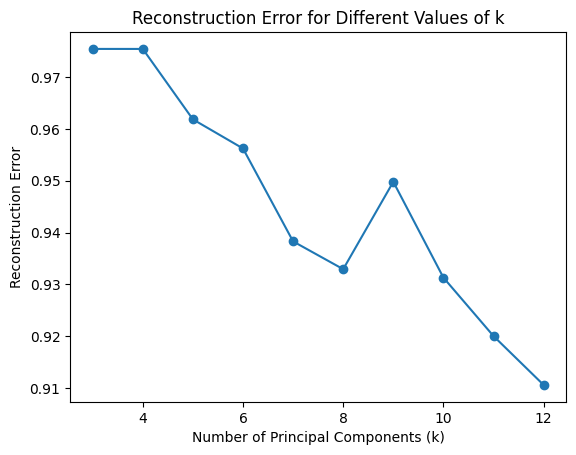

In [13]:
plt.plot(k_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Values of k')
plt.show()

In [ ]:


# Fuzzy c means clustering algorithm
N = 6
g = 1.2

#before pca
n = len(X)
d = len(X[0]) ## Number of features
addZeros = np.zeros((n, 1))
X = np.append(X, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", X)
print("\nTotal number of data: ", n)
print("Total number of features: ", d)
print("Total number of Clusters: ", N)

# Create an empty array of centers
C = np.zeros((N, d + 1))
# print(C)

# Randomly initialize the membership matrix
m = np.random.dirichlet(np.ones(N), size=n)
print("\nThe initial membership matrix: \n", np.round(m, 2))

for it in range(15):  # Total number of iterations

    # Compute centroid
    for j in range(N):
        denoSum = sum(np.power(m[:, j], g))

        sumMM = 0
        for i in range(n):
            mm = np.multiply(np.power(m[i, j], g), X[i, :])
            sumMM += mm
        cc = sumMM / denoSum
        C[j] = np.reshape(cc, d + 1)

    # updating membership matrix
    for i in range(n):
        denoSumNext = 0
        for j in range(N):
            denoSumNext += np.power(1 / distance.euclidean(C[j, 0:d], X[i, 0:d]), 1 / (g - 1))
        for j in range(N):
            M = np.power((1 / distance.euclidean(C[j, 0:d], X[i, 0:d])), 1 / (g - 1)) / denoSumNext
            m[i, j] = M

print("\nThe final membership matrix: \n", np.round(m, 2))
# adding cluster number
for i in range(n):
    cNumber = np.where(m[i] == np.amax(m[i]))
    X[i, d] = cNumber[0]

print("\nThe data with cluster number: \n", X)




The FCM algorithm: 

The training data: 
 [[30. 22. 18. ... 22. 52.  0.]
 [28. 19. 22. ... 20. 56.  0.]
 [27. 21. 18. ... 18. 53.  0.]
 ...
 [ 4. 20. 17. ... 22. 40.  0.]
 [13. 20. 15. ... 33. 59.  0.]
 [ 4. 20. 15. ... 19. 37.  0.]]

Total number of data:  716
Total number of features:  12
Total number of Clusters:  6

The initial membership matrix: 
 [[0.26 0.09 0.17 0.15 0.28 0.05]
 [0.06 0.23 0.14 0.19 0.02 0.36]
 [0.06 0.12 0.04 0.08 0.67 0.04]
 ...
 [0.03 0.06 0.43 0.25 0.   0.22]
 [0.1  0.01 0.05 0.42 0.1  0.32]
 [0.17 0.01 0.18 0.03 0.07 0.53]]

The final membership matrix: 
 [[0.01 0.86 0.   0.11 0.01 0.  ]
 [0.02 0.73 0.01 0.21 0.02 0.  ]
 [0.1  0.71 0.   0.14 0.03 0.01]
 ...
 [0.04 0.   0.   0.   0.8  0.15]
 [0.25 0.09 0.03 0.45 0.16 0.01]
 [0.04 0.   0.   0.   0.33 0.63]]

The data with cluster number: 
 [[30. 22. 18. ... 22. 52.  1.]
 [28. 19. 22. ... 20. 56.  1.]
 [27. 21. 18. ... 18. 53.  1.]
 ...
 [ 4. 20. 17. ... 22. 40.  4.]
 [13. 20. 15. ... 33. 59.  3.]
 [ 4. 20. 15

In [ ]:

# after pca



# Print the number of data and dimension

addZeros = np.zeros((n, 1))
X_transformed = np.append(X_transformed, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", X_transformed)
print("\nTotal number of data: ", n)
print("Total number of features: ", d)
print("Total number of Clusters: ", N)

# Create an empty array of centers
C = np.zeros((N, d +1 ))
# print(C)

# Randomly initialize the membership matrix
m = np.random.dirichlet(np.ones(N), size=n)
print("\nThe initial membership matrix: \n", np.round(m, 2))

for it in range(15):  # Total number of iterations

    # Compute centroid
    for j in range(N):
        denoSum = sum(np.power(m[:, j], g))

        sumMM = 0
        for i in range(n):
            mm = np.multiply(np.power(m[i, j], g), X_transformed[i, :])
            sumMM += mm
        cc = sumMM / denoSum
        C[j] = np.reshape(cc, d +1)

    # updating membership matrix
    for i in range(n):
        denoSumNext = 0
        for j in range(N):
            denoSumNext += np.power(1 / distance.euclidean(C[j, 0:d], X_transformed[i, 0:d]), 1 / (g - 1))
        for j in range(N):
            M = np.power((1 / distance.euclidean(C[j, 0:d], X_transformed[i, 0:d])), 1 / (g - 1)) / denoSumNext
            m[i, j] = M

print("\nThe final membership matrix: \n", np.round(m, 2))
#adding cluster number
for i in range(n):
    cNumber = np.where(m[i] == np.amax(m[i]))
    X_transformed[i, d] = cNumber[0]

print("\nThe data with cluster number: \n", X_transformed)

The FCM algorithm: 

The training data: 
 [[11.62032429 -3.21474189 -7.05991211 -0.16977963  7.5723108   0.        ]
 [12.1494022  -5.98726174 -2.05343819  5.36684617  3.46724336  0.        ]
 [ 8.91379286 -8.7720347  -1.55254619 -3.49117191  2.17371738  0.        ]
 ...
 [-6.78177502 -6.48127342  4.79257432  1.25913176 -4.65111877  0.        ]
 [-0.34325865  5.20088666  2.22682563  2.81385055 -0.74562463  0.        ]
 [-8.6982186  -9.60852859  5.15502387  0.1038669  -5.14367392  0.        ]]

Total number of data:  716
Total number of features:  5
Total number of Clusters:  6

The initial membership matrix: 
 [[0.01 0.17 0.03 0.14 0.61 0.03]
 [0.13 0.38 0.24 0.07 0.06 0.13]
 [0.01 0.77 0.08 0.06 0.01 0.07]
 ...
 [0.31 0.03 0.41 0.09 0.   0.16]
 [0.11 0.06 0.15 0.49 0.12 0.07]
 [0.12 0.3  0.01 0.11 0.24 0.23]]

The final membership matrix: 
 [[0.   0.   0.02 0.   0.96 0.02]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.01 0.02 0.01 0.96 0.  ]
 ...
 [0.   0.04 0.   0.96 0.   0.  ]
 [0.   0.